# Iris dataset - Machine Learning and Statistics   Winter 23/24

## Author: David Higgins - G00411302     Atlantic Technological University

In [1]:
#import necessary packages for notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
#load the dataset from sklearn
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


## Introduction

The Fisher Iris dataset, introduced by Sir Ronald A. Fisher in 1936, is one of the major datasets used in the fields of data science and machine learning. This dataset, featuring 150 iris flower samples, is possibly the most common dataset used in the teaching of data analytics and in the assessment of different classification algorithms. Its primary purpose is to explore the feasibility of utilizing quantitative measurements—namely, sepal and petal dimensions—to accurately classify iris flowers into three distinct species: Iris setosa, Iris versicolor, and Iris virginica.

The dataset itself is fairly simple. Each iris sample is characterized by four features: sepal length, sepal width, petal length, and petal width - the measurement of each is recorded in centimeters. These features are used for testing supervised learning algorithms. Each algorithm is tested by training the algorithm on a certain percentage of the data, known as the train set. The algorithm is then tested on the remaining data, called the test set. Since we already know the correct classification for each sample in the test set, we can quantify the accuracy of the algorithm. In this project, we will investigate the dataset itself and then apply a suitable supervised learning algorithm to the dataset.

## Supervised Learning and Classification Algorithms

Supervised learning is a specific type of machine learning that take makes use of labeled training data. Using this labelled data to establish a baseline, a particular algorithm can then make an assessment on the classification of unlabelled data.

The key to supervised learning is having the labelled dataset to determine the relationship between the input variables and the output variable. In the case of the iris dataset, the input variables are the four characteristics: sepal width, sepal length, petal width and petal length. The output variable is the label or iris variety: setosa, versicolor and virginica. The algorithm uses the relationship to generalise from patterns detected in the input variables. This allows the algorithm to make an assessment on previously unseen or unlabelled data. The accuracy of any particular algorithm is dependent on many factors including the size of the labelled dataset, the train/test set and the underlying structure of the dataset.

Supervised learning includes two primary categories: regression and classification. In regression tasks, the goal is to predict a continuous output variable, such as housing prices. Conversely, classification tasks entail categorising input data into predefined discrete classes or categories, as seen in image recognition. Classification algorithms include logistic regression, decision trees, support vector machines, and neural networks.

Some real world applications of classification algorithms are image recognition (e.g., the MNIST dataset), and medical diagnosis (e.g., the Breast Cancer Wisconsin dataset).

These algorithms harness labeled training data to learn the intricate relationships between input features and output classes.  A range of classification algorithms exists, each with distinct capabilities and suitability for specific tasks.

For instance, logistic regression models class probabilities, decision trees hierarchically partition feature spaces (e.g., the Iris dataset), support vector machines seek optimal hyperplanes for separation, and k-nearest neighbors classify based on proximity. In recent years, deep neural networks (e.g., CNNs for image classification using datasets like CIFAR-10) have made notable strides in handling complex, high-dimensional data.

The selection of a classification algorithm depend on factors such as data complexity, interpretability requirements, and computational resources.

## Exploratory Data Analysis

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%  

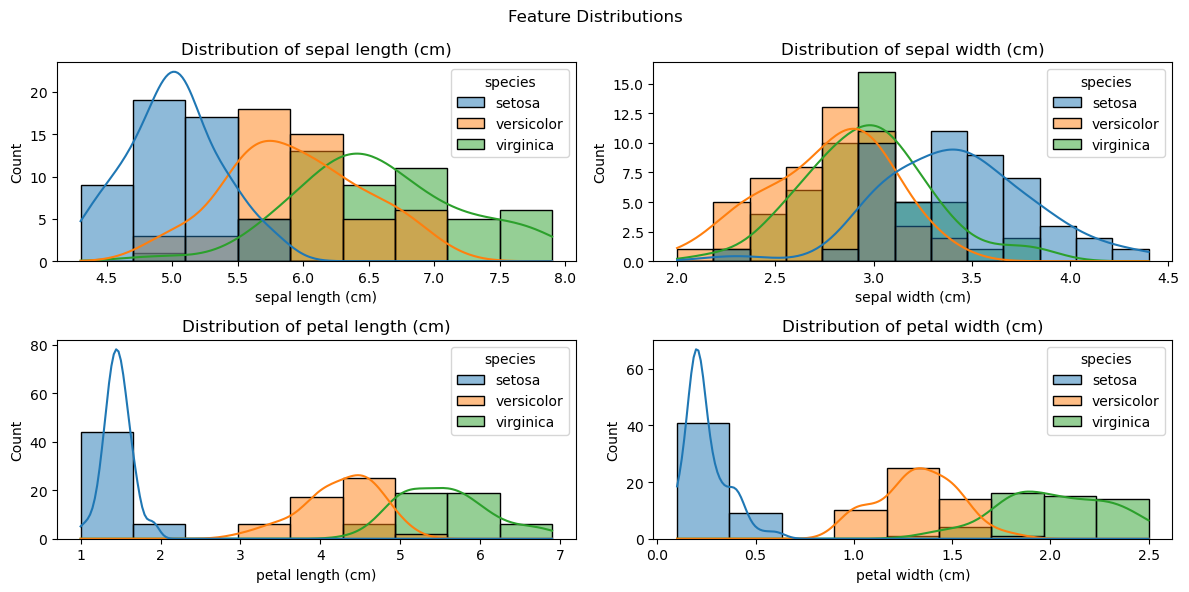

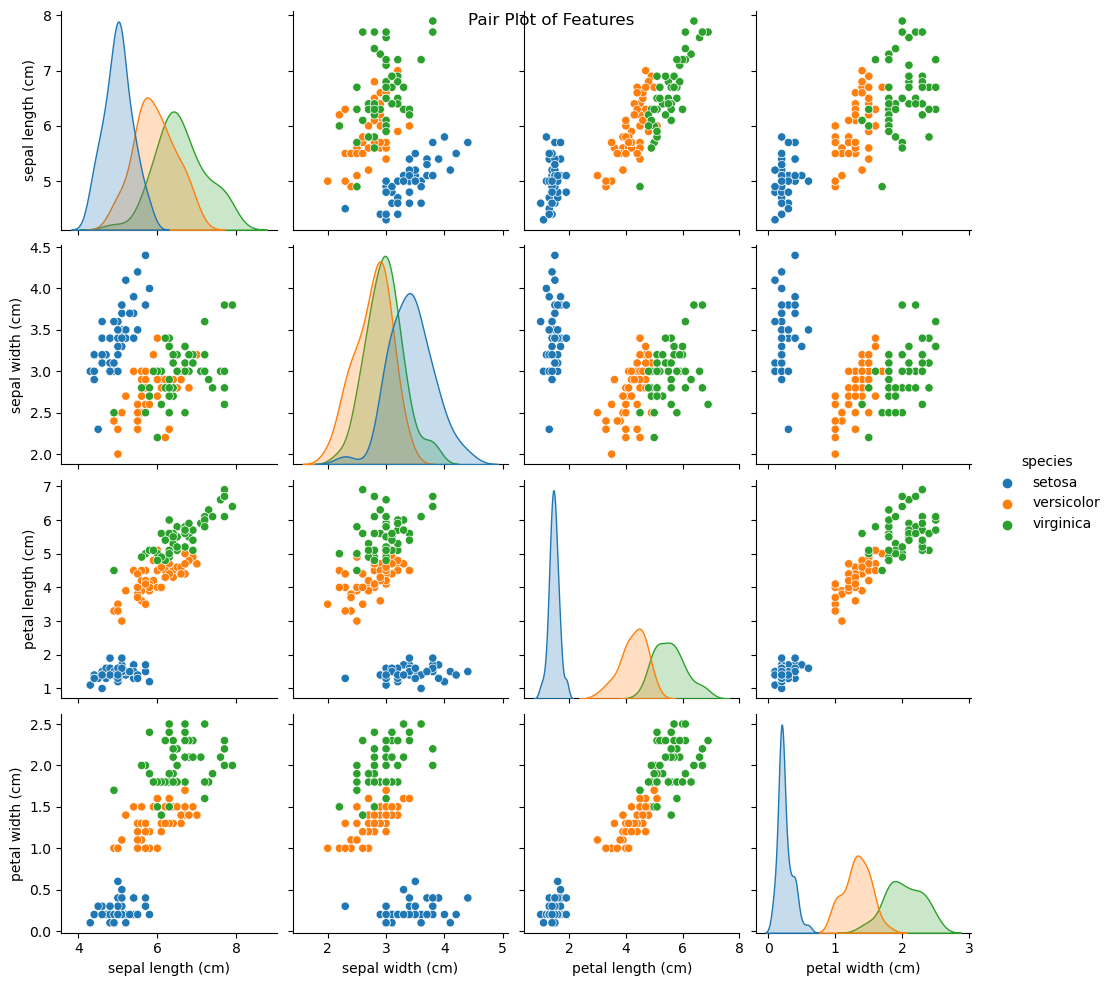

C:\Users\dhiggins\AppData\Local\Temp\ipykernel_7028\984429858.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


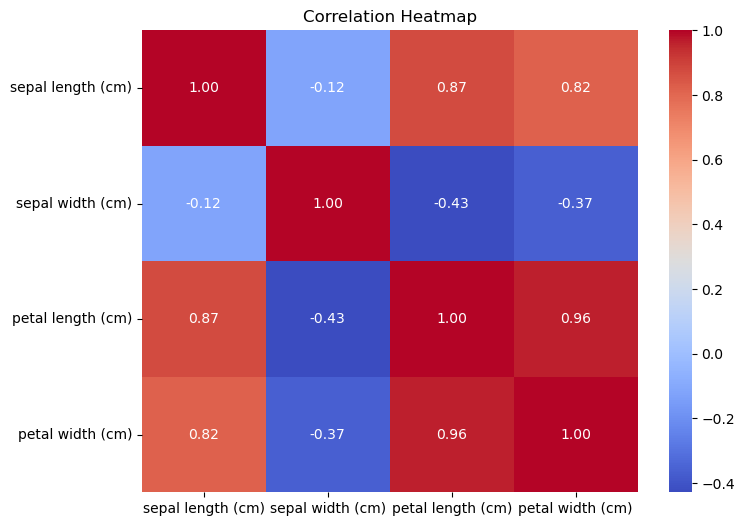

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of each feature
plt.figure(figsize=(12, 6))
plt.suptitle("Feature Distributions")
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, hue='species', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Create a pair plot to visualize relationships between features
sns.pairplot(df, hue='species')
plt.suptitle("Pair Plot of Features")
plt.show()

# Create a correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The initial analysis of the dataset show there are no missing values. It will not be necessary to preprocess the dataset using the dropna method to clean the data. These results also suggest that the setosa species is relatively easy to differentiate from the other two species, particularly when considering the petal lengths and widths. The sepal characteristics are less clear but the distribution plots indicate there may a statistically significant difference between setosa and the other two varieties. In each of the pair plots above, a line can be constructed on the plot that would isolate the setosa values from the other varieties completely. The versicolor and virginica show some separation but are intermingled to some degree on each plot. The separation seen between each species indicates that the K Nearest Neighbours classifier may be an appropriate algorithm to use here. We will carry out a t-test to gain more insight on this.

In [4]:
# Separate the data into three groups: setosa, versicolor, and virginica
setosa_data = df[df['species'] == 'setosa']
other_data = df[df['species'].isin(['versicolor', 'virginica'])]

# Perform a t-test between setosa and the other two varieties
t_stat, p_value = stats.ttest_ind(setosa_data['sepal length (cm)'], other_data['sepal length (cm)'], equal_var=False)

print("Results of setosa versus other varieties t-tests:")
# Check the p-value to determine statistical significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"\nReject the null hypothesis: There is a significant difference between setosa and the other two varieties (p-value = {p_value})")
else:
    print(f"\nFail to reject the null hypothesis: There is no significant difference between setosa and the other two varieties (p-value = {p_value})")

# Perform a t-test between setosa and the other two varieties
t_stat, p_value = stats.ttest_ind(setosa_data['sepal width (cm)'], other_data['sepal width (cm)'], equal_var=False)

# Check the p-value to determine statistical significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"\nReject the null hypothesis: There is a significant difference between setosa and the other two varieties (p-value = {p_value})")
else:
    print(f"\nFail to reject the null hypothesis: There is no significant difference between setosa and the other two varieties (p-value = {p_value})")


    
# Separate the data into versicolor and virginica
versicolor_data = df[df['species'] == 'versicolor']
virginica_data = df[df['species'] == 'virginica']

# List of characteristics to perform t-tests on
characteristics = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

print("\n\n\nResults of virginica and versicolor t-tests:")
# Perform t-tests for each characteristic
for char in characteristics:
    t_stat, p_value = stats.ttest_ind(versicolor_data[char], virginica_data[char], equal_var=False)

    # Check the p-value to determine statistical significance
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"\nCharacteristic: {char}")
        print(f"\nReject the null hypothesis: There is a significant difference (p-value = {p_value})")
    else:
        print(f"\nCharacteristic: {char}")
        print(f"\nFail to reject the null hypothesis: There is no significant difference (p-value = {p_value})")
    print()

Results of setosa versus other varieties t-tests:

Reject the null hypothesis: There is a significant difference between setosa and the other two varieties (p-value = 7.709331032755147e-32)

Reject the null hypothesis: There is a significant difference between setosa and the other two varieties (p-value = 1.0353958396281789e-13)



Results of virginica and versicolor t-tests:

Characteristic: sepal length (cm)

Reject the null hypothesis: There is a significant difference (p-value = 1.8661443873771216e-07)


Characteristic: sepal width (cm)

Reject the null hypothesis: There is a significant difference (p-value = 0.001819483482104968)


Characteristic: petal length (cm)

Reject the null hypothesis: There is a significant difference (p-value = 4.900287527398095e-22)


Characteristic: petal width (cm)

Reject the null hypothesis: There is a significant difference (p-value = 2.111534400988573e-25)



## Synthetic dataset

Using the code below, we can generate a synthetic dataset to extend the set of data we have available for testing algorithms. We accomplish this by adding random noise to each characteristic in each row of data. The noise will create unique sets of data but is sufficiently close to the original data so that the labels do not need to be changed.

In [5]:
#Define seed for reproducibility
seed = 41
# Define the feature columns
feature_columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

# Create an empty DataFrame for test cases
syn_df = pd.DataFrame(columns=feature_columns)

# Generate 150 test cases
num_test_cases = 150
np.random.seed(seed)  # Set a random seed for reproducibility

for _ in range(num_test_cases):
    # Randomly sample feature values from the distribution of the Iris dataset
    random_sample = df.sample(1)[feature_columns].values
    
    # Add random noise to the sampled values to create variability
    noise = np.random.normal(0, 0.2, size=(1, len(feature_columns)))
    test_case = random_sample + noise
    
    # Ensure no negative or zero values in the test case
    test_case[test_case <= 0] = 1
    
    # Append the test case to the test DataFrame
    syn_df = pd.concat([syn_df, pd.DataFrame(test_case, columns=feature_columns)], ignore_index=True)

# Display the generated test DataFrame
print("Synthetic DataFrame:")
print(syn_df.head())

Synthetic DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.788074          2.552267           5.033128          1.340838
1           5.476605          2.434777           3.653770          1.184336
2           4.985880          3.005215           1.683128          0.228837
3           4.715794          3.253905           1.714755          0.041691
4           5.096960          3.175664           2.033172          0.184835


## K Nearest Neighbours

In [6]:
# Define the feature matrix (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Create a KNN classifier with a specified 'k' value (e.g., k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN classifier: {accuracy:.2f}")

Accuracy of the KNN classifier: 0.91


The accuracy of the classifier created using the K Nearest Neighbour algorithim in the first run is very encouraging but should be compared to runs using variations in the train/test split and k values.

In [7]:
# Define variations in train/test split, random state, and k values
split_ratios = [0.3, 0.5, 0.7]  # Train/test split ratios
k_values = [3, 4, 5, 6]  # K values (number of neighbors), including the original value 3

# Loop over different train/test splits
for split_ratio in split_ratios:
    for k in k_values:
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_ratio, random_state=seed)

        # Create a KNN classifier with the specified 'k' value
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train the classifier on the training data
        knn.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = knn.predict(X_test)

        # Calculate and print the accuracy of the classifier
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Train/Test Split Ratio: {split_ratio:.2f}, K Value: {k}, Accuracy: {accuracy:.2f}")

Train/Test Split Ratio: 0.30, K Value: 3, Accuracy: 0.93
Train/Test Split Ratio: 0.30, K Value: 4, Accuracy: 0.91
Train/Test Split Ratio: 0.30, K Value: 5, Accuracy: 0.92
Train/Test Split Ratio: 0.30, K Value: 6, Accuracy: 0.91
Train/Test Split Ratio: 0.50, K Value: 3, Accuracy: 0.95
Train/Test Split Ratio: 0.50, K Value: 4, Accuracy: 0.95
Train/Test Split Ratio: 0.50, K Value: 5, Accuracy: 0.96
Train/Test Split Ratio: 0.50, K Value: 6, Accuracy: 0.96
Train/Test Split Ratio: 0.70, K Value: 3, Accuracy: 0.91
Train/Test Split Ratio: 0.70, K Value: 4, Accuracy: 0.89
Train/Test Split Ratio: 0.70, K Value: 5, Accuracy: 0.93
Train/Test Split Ratio: 0.70, K Value: 6, Accuracy: 0.93


In [8]:
# Define variations in train/test split and k values
split_ratios = [0.3, 0.5, 0.7]  # Train/test split ratios
k_values = [3, 4, 5, 6]  # K values (number of neighbors), including the original value 3

# Initialize an empty list to store the results
results = []

# Loop over different train/test splits, random states, and k values
for split_ratio in split_ratios:
    for k in k_values:
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_ratio, random_state=seed)

        # Create a KNN classifier with the specified 'k' value
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train the classifier on the training data
        knn.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = knn.predict(X_test)

        # Calculate and print the accuracy of the classifier
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Train/Test Split Ratio: {split_ratio:.2f}, K Value: {k}, Accuracy: {accuracy:.2f}")

        # Append the results to the list
        results.append(np.array([split_ratio, k, accuracy]))

# Convert the list of numpy arrays to a single numpy array
results_array = np.array(results)

Train/Test Split Ratio: 0.30, K Value: 3, Accuracy: 0.93
Train/Test Split Ratio: 0.30, K Value: 4, Accuracy: 0.91
Train/Test Split Ratio: 0.30, K Value: 5, Accuracy: 0.92
Train/Test Split Ratio: 0.30, K Value: 6, Accuracy: 0.91
Train/Test Split Ratio: 0.50, K Value: 3, Accuracy: 0.95
Train/Test Split Ratio: 0.50, K Value: 4, Accuracy: 0.95
Train/Test Split Ratio: 0.50, K Value: 5, Accuracy: 0.96
Train/Test Split Ratio: 0.50, K Value: 6, Accuracy: 0.96
Train/Test Split Ratio: 0.70, K Value: 3, Accuracy: 0.91
Train/Test Split Ratio: 0.70, K Value: 4, Accuracy: 0.89
Train/Test Split Ratio: 0.70, K Value: 5, Accuracy: 0.93
Train/Test Split Ratio: 0.70, K Value: 6, Accuracy: 0.93


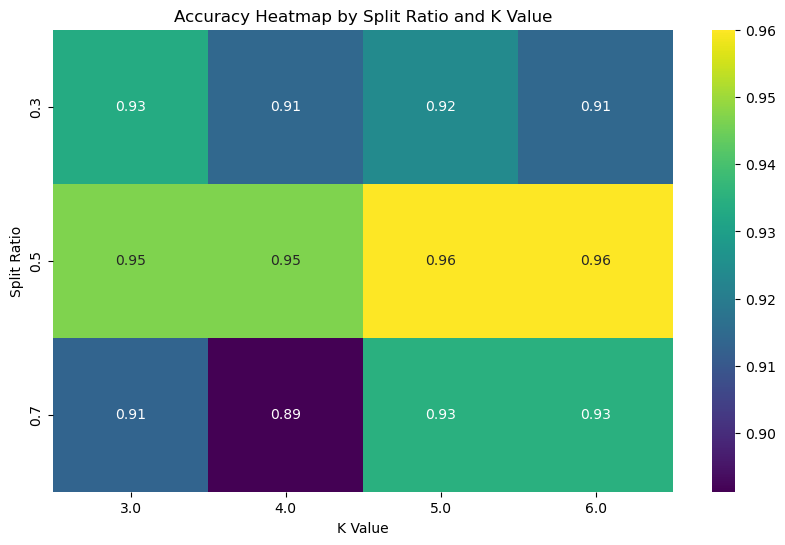

In [9]:
# Convert the results array to a DataFrame for easier manipulation
results_df = pd.DataFrame(results_array, columns=['Split Ratio', 'K Value', 'Accuracy'])

# Create a pivot table for the heatmap
pivot_table = results_df.pivot_table(index='Split Ratio', columns='K Value', values='Accuracy')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Accuracy Heatmap by Split Ratio and K Value')
plt.show()

## Optimum value of K

Error Rate vs. K Value Plot:

Since the Iris dataset is not too large, it's feasible to calculate the error rate for a range of $k$ values and plot these to observe the trend. This method is straightforward and gives a clear visual indication of the performance for different $k$ values.

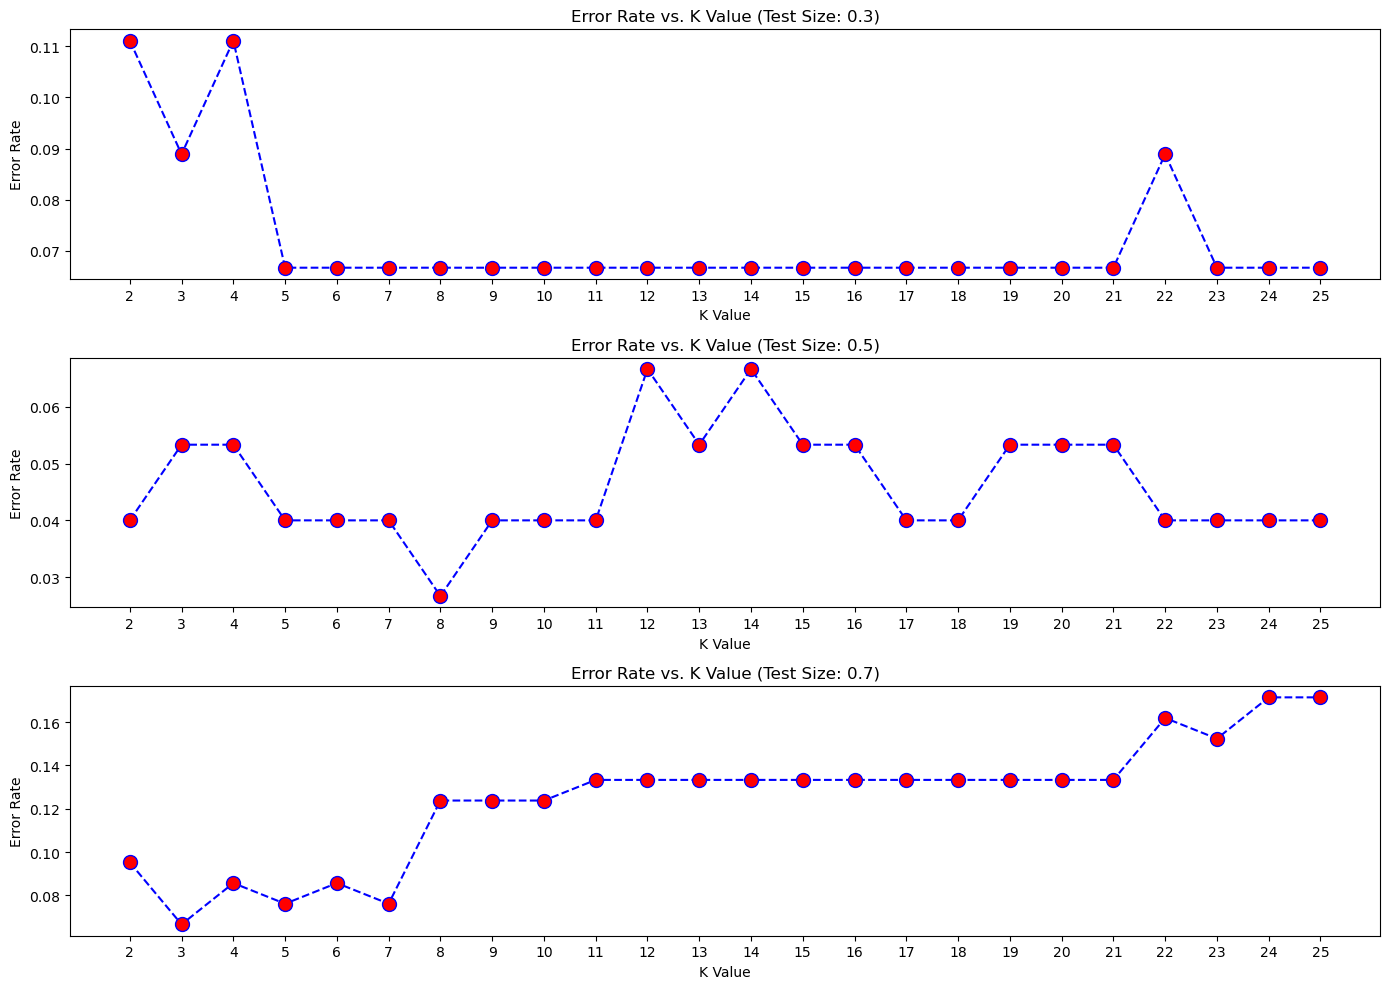

In [10]:
# Define different train/test split values
split_values = [0.3, 0.5, 0.7]

# Trying different k values
k_values = range(2, 26)

# Create a figure for the plots
plt.figure(figsize=(14, 10))

for i, split_value in enumerate(split_values, 1):
    # Split the dataset into a training set and a testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_value, random_state=41)

    error_rates = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error_rate = 1 - accuracy_score(y_test, y_pred)
        error_rates.append(error_rate)

    # Plotting error rates for each split value
    plt.subplot(3, 1, i)
    plt.plot(k_values, error_rates, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title(f'Error Rate vs. K Value (Test Size: {split_value})')
    plt.xlabel('K Value')
    plt.ylabel('Error Rate')
    plt.xticks(k_values)

plt.tight_layout()
plt.show()

It is clear from the plot above that a $k=8$ with a train/test split = 0.5 will give the lowest error rate. These rates are however dependent on the random state seed.

Grid Search with Cross-Validation:

If you want a more automated approach, using Grid Search along with cross-validation can be effective. It systematically works through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.

In [11]:
# Define different train/test split values
split_values = [0.3, 0.5, 0.7]

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(2, 26)}

for seed in range(42, 45):  # Different random states for each split
    print(f"\nRandom State: {seed}")
    for split_value in split_values:
        print(f"\nTrain/Test Split: {split_value}")

        # Split the dataset into a training set and a testing set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_value, random_state=seed)

        # Create a KNN classifier
        knn = KNeighborsClassifier()

        # Instantiate the GridSearchCV object with 5-fold cross-validation
        grid_knn = GridSearchCV(knn, param_grid, cv=5)

        # Fit the model
        grid_knn.fit(X_train, y_train)

        # Print the best parameters and best score
        print("Best parameters:", grid_knn.best_params_)
        print("Best score:", grid_knn.best_score_)

        # Optionally, evaluate on the test set
        best_knn = grid_knn.best_estimator_
        test_accuracy = best_knn.score(X_test, y_test)
        print("Test set accuracy:", test_accuracy)


Random State: 42

Train/Test Split: 0.3
Best parameters: {'n_neighbors': 7}
Best score: 0.9523809523809523
Test set accuracy: 1.0

Train/Test Split: 0.5
Best parameters: {'n_neighbors': 8}
Best score: 0.9466666666666667
Test set accuracy: 0.9466666666666667

Train/Test Split: 0.7
Best parameters: {'n_neighbors': 3}
Best score: 0.9777777777777779
Test set accuracy: 0.9714285714285714

Random State: 43

Train/Test Split: 0.3
Best parameters: {'n_neighbors': 9}
Best score: 0.9619047619047618
Test set accuracy: 0.9555555555555556

Train/Test Split: 0.5
Best parameters: {'n_neighbors': 6}
Best score: 1.0
Test set accuracy: 0.9466666666666667

Train/Test Split: 0.7
Best parameters: {'n_neighbors': 2}
Best score: 1.0
Test set accuracy: 0.9523809523809523

Random State: 44

Train/Test Split: 0.3
Best parameters: {'n_neighbors': 4}
Best score: 0.9428571428571428
Test set accuracy: 0.9555555555555556

Train/Test Split: 0.5
Best parameters: {'n_neighbors': 4}
Best score: 0.96
Test set accuracy: 

## Conclusions

We have seen that the K nearest neighbours algorithm works quite well with both the original and synthetic datasets. The main difficulty that arose was identifying the optimum parameters to use for the algorithm. Using the error rates, we determined that the optimum parameters were $k = 8$ with a train/test split of 0.5. However, when using the grid search with cross validation, the optimum parameters were $k = 5$ with a train/test split of 0.7. 

## References
- https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/ 8/12/2023
- Leif E. Peterson (2009) K-nearest neighbor. Scholarpedia, 4(2):1883.
- Pádraig Cunningham and Sarah Jane Delany. 2021. k-Nearest Neighbour Classifiers - A Tutorial.ACM Comput.
Surv. 54, 6, Article 128 (July 2021), 25 pages.
- F. Shi, H. Cao, X. Zhang and X. Chen, "A Reinforced k-Nearest Neighbors Method With Application to Chatter Identification in High-Speed Milling," in IEEE Transactions on Industrial Electronics, vol. 67, no. 12, pp. 10844-10855, Dec. 2020, doi: 10.1109/TIE.2019.2962465.

-----
## End